In [1]:
import os
import numpy as np
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib
import matplotlib.pyplot as plt
from PIL import Image


In [3]:
device=torch.device('cpu')
print(device)

transformer=transforms.Compose([
    transforms.Resize((150,150)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),  #0-255 to 0-1, numpy to tensors
    transforms.Normalize([0.5,0.5,0.5], # 0-1 to [-1,1] , formula (x-mean)/std
                        [0.5,0.5,0.5])
])

cpu


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


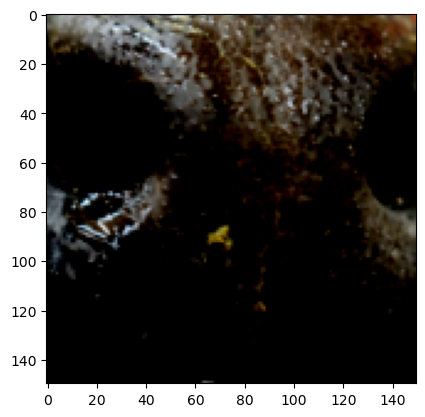

In [4]:
train_path='C:/Users/dell/Desktop/computervision/basedata/train'
test_path='C:/Users/dell/Desktop/computervision/basedata/validation'

train_loader=DataLoader(
    torchvision.datasets.ImageFolder(train_path,transform=transformer),
    batch_size=64, shuffle=True
)
test_loader=DataLoader(
    torchvision.datasets.ImageFolder(test_path,transform=transformer),
    batch_size=32, shuffle=True
)


img_path = 'C:/Users/dell/Desktop/computervision/cattle_0200_DSCF3871.jpg'
image = Image.open(img_path)
transformed_image = transformer(image)
transformed_image = transformed_image.numpy().transpose(1, 2, 0)
plt.imshow(transformed_image)
plt.show()


In [5]:
root=pathlib.Path(train_path)
classes=sorted([j.name.split('/')[-1] for j in root.iterdir()])
print(classes)

['cattle_0100', 'cattle_0200', 'cattle_0300', 'cattle_0400', 'cattle_0500', 'cattle_0600', 'cattle_0700', 'cattle_0800', 'cattle_0900', 'cattle_1000', 'cattle_1100', 'cattle_1200', 'cattle_1300', 'cattle_1400', 'cattle_1500', 'cattle_1600', 'cattle_1700', 'cattle_1800', 'cattle_1900', 'cattle_2000', 'cattle_2100', 'cattle_2200', 'cattle_2220', 'cattle_2300', 'cattle_2320', 'cattle_2400', 'cattle_2500', 'cattle_2510', 'cattle_2600', 'cattle_2700', 'cattle_2710', 'cattle_2740', 'cattle_2800', 'cattle_2900', 'cattle_2930', 'cattle_3000', 'cattle_3100', 'cattle_3200', 'cattle_3300', 'cattle_3400', 'cattle_3420', 'cattle_3802', 'cattle_3812', 'cattle_3814', 'cattle_3819', 'cattle_3832', 'cattle_3842', 'cattle_3844', 'cattle_3847', 'cattle_3852']


In [6]:
class ConvNet(nn.Module):
    def __init__(self,num_classes=6):
        super(ConvNet,self).__init__()
        self.conv1=nn.Conv2d(in_channels=3,out_channels=12,kernel_size=3,stride=1,padding=1)
        self.bn1=nn.BatchNorm2d(num_features=12)
        self.relu1=nn.ReLU()
        self.pool=nn.MaxPool2d(kernel_size=2)
        self.conv2=nn.Conv2d(in_channels=12,out_channels=20,kernel_size=3,stride=1,padding=1)
        self.relu2=nn.ReLU()
        self.conv3=nn.Conv2d(in_channels=20,out_channels=32,kernel_size=3,stride=1,padding=1)
        self.bn3=nn.BatchNorm2d(num_features=32)
        self.relu3=nn.ReLU()
        self.fc=nn.Linear(in_features=75 * 75 * 32,out_features=num_classes)
    def forward(self,input):
        output=self.conv1(input)
        output=self.bn1(output)
        output=self.relu1(output)
        output=self.pool(output)
        output=self.conv2(output)
        output=self.relu2(output)
        output=self.conv3(output)
        output=self.bn3(output)
        output=self.relu3(output)
        output=output.view(-1,32*75*75)
        output=self.fc(output)
        return output

In [7]:
model=ConvNet(num_classes=50).to(device)
optimizer=Adam(model.parameters(),lr=0.001,weight_decay=0.0001)
loss_function=nn.CrossEntropyLoss()
num_epochs=20
train_count=len(glob.glob(train_path+'/**/*.jpg'))
test_count=len(glob.glob(test_path+'/**/*.jpg'))
print(train_count,test_count)
best_accuracy=0.0

581 146


Epoch: 0 Train Loss: tensor(38.3864) Train Accuracy: 0.32358003442340794 Test Accuracy: 0.08904109589041095
Epoch: 1 Train Loss: tensor(16.5600) Train Accuracy: 0.6660929432013769 Test Accuracy: 0.3219178082191781
Epoch: 2 Train Loss: tensor(5.9852) Train Accuracy: 0.8416523235800344 Test Accuracy: 0.4246575342465753
Epoch: 3 Train Loss: tensor(2.9504) Train Accuracy: 0.8881239242685026 Test Accuracy: 0.678082191780822
Epoch: 4 Train Loss: tensor(2.1540) Train Accuracy: 0.9449225473321858 Test Accuracy: 0.815068493150685
Epoch: 5 Train Loss: tensor(0.6740) Train Accuracy: 0.9707401032702238 Test Accuracy: 0.821917808219178
Epoch: 6 Train Loss: tensor(0.8096) Train Accuracy: 0.9535283993115319 Test Accuracy: 0.8287671232876712
Epoch: 7 Train Loss: tensor(0.9350) Train Accuracy: 0.9535283993115319 Test Accuracy: 0.8698630136986302
Epoch: 8 Train Loss: tensor(0.7875) Train Accuracy: 0.9776247848537005 Test Accuracy: 0.9246575342465754
Epoch: 9 Train Loss: tensor(0.1378) Train Accuracy: 0.

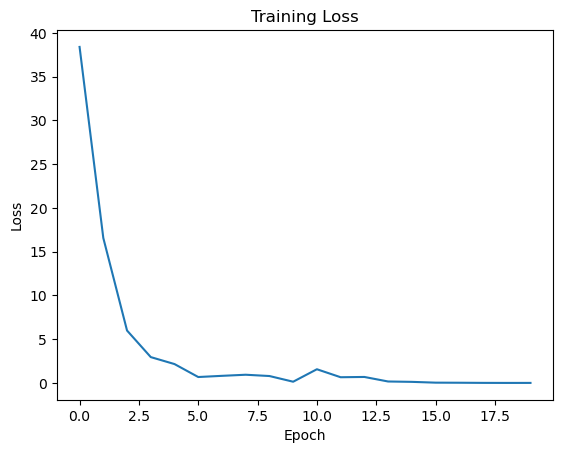

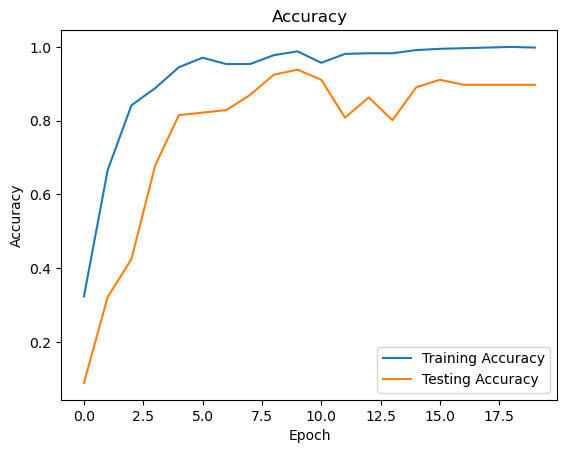

In [10]:
import matplotlib.pyplot as plt

train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    train_accuracy = 0.0
    train_loss = 0.0
    for i, (images,labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_function(outputs,labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.data*images.size(0)
        _,prediction = torch.max(outputs.data,1)
        train_accuracy += int(torch.sum(prediction==labels.data))
    train_accuracy = train_accuracy/train_count
    train_loss = train_loss/train_count
    model.eval()
    
    test_accuracy = 0.0
    for i, (images,labels) in enumerate(test_loader):
        with torch.no_grad():
            outputs = model(images)
        _,prediction = torch.max(outputs.data,1)
        test_accuracy += int(torch.sum(prediction==labels.data))
    test_accuracy = test_accuracy/test_count
    print('Epoch: '+str(epoch)+' Train Loss: '+str(train_loss)+' Train Accuracy: '+str(train_accuracy)+' Test Accuracy: '+str(test_accuracy))
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    if test_accuracy > best_accuracy:
        torch.save(model.state_dict(),'best_checkpoint.model')
        best_accuracy = test_accuracy
        
# Plot the training loss
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot the training and testing accuracy
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Testing Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

